Predict Calories Burned

Dataset: https://www.kaggle.com/datasets/fmendes/fmendesdat263xdemos

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [6]:
exercise_dataset=pd.read_csv('exercise.csv')
calories_dataset=pd.read_csv('calories.csv')

In [7]:
dataset=pd.concat([exercise_dataset,calories_dataset['Calories']],axis=1)

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


Data Visualization

In [10]:
sns.set()

c:\Users\Dell\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

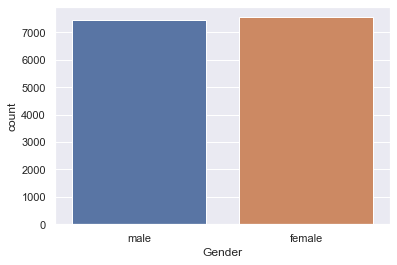

In [11]:
sns.countplot(dataset['Gender'])

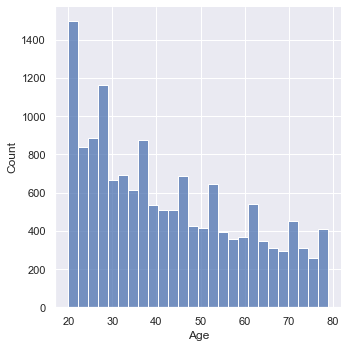

In [12]:
sns.displot(dataset['Age'])

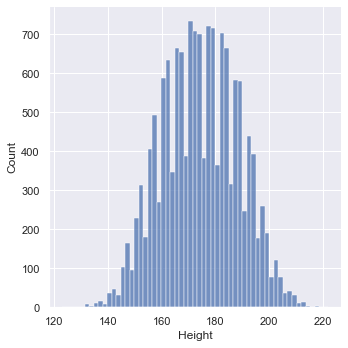

In [13]:
sns.displot(dataset['Height'])


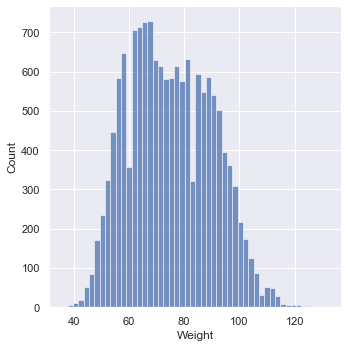

In [14]:
sns.displot(dataset['Weight'])


In [15]:
corr=dataset.corr()

<AxesSubplot:>

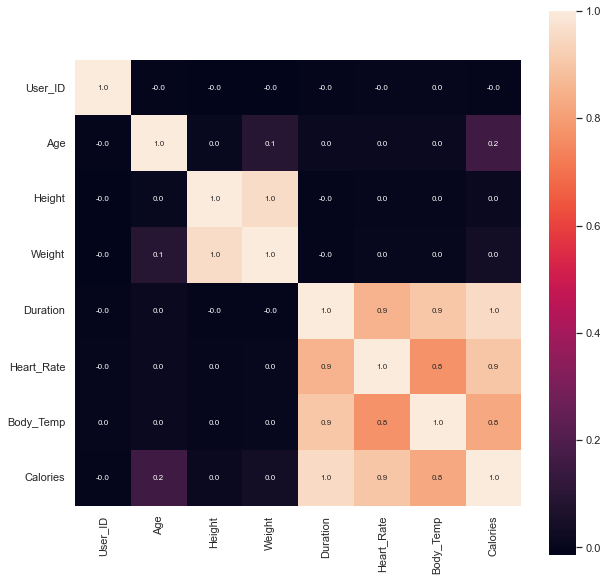

In [18]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8})

In [19]:
dataset.replace({'Gender':{'male':0,'female':1}},inplace=True)

In [20]:
X=dataset.drop('Calories',axis=1)
Y=dataset['Calories']

In [21]:
x_train, x_test, y_train, y_test=train_test_split(X,Y,test_size=.2,random_state=42)


In [22]:
# model training 
model=XGBRegressor()


In [23]:
model.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [26]:

test_pred=model.predict(x_test)
mae=metrics.mean_absolute_error(y_test,test_pred)
mae

1.6240758475263914